<a href="https://colab.research.google.com/github/aidagh/Action-Recognition/blob/main/utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import time
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shutil.unpack_archive('drive/My Drive/resnet50-reports-CS.zip',extract_dir='resnet50_cs')

In [ ]:
shutil.unpack_archive('drive/My Drive/resnet50-models-CS.zip',extract_dir='resnet50_cs_models')

In [ ]:
shutil.unpack_archive('drive/My Drive/resnet50-reports-CV.zip',extract_dir='resnet50_cv')

In [ ]:
shutil.unpack_archive('drive/My Drive/resnet50-models-CV.zip',extract_dir='resnet50_cv_models')

In [ ]:
shutil.unpack_archive('drive/My Drive/rnn-models-CS-full.zip',extract_dir='rnn_cs')
shutil.unpack_archive('drive/My Drive/rnn-models-CV-full.zip',extract_dir='rnn_cv')

In [ ]:
shutil.unpack_archive('drive/My Drive/rnn-reports-CS-4.zip',extract_dir='rnn_cs')
shutil.unpack_archive('drive/My Drive/rnn-reports-CS-8.zip',extract_dir='rnn_cs_8')
shutil.unpack_archive('drive/My Drive/rnn-reports-CS-full.zip',extract_dir='rnn_cs_full')
for r,d,f in os.walk('rnn_cs_8'):
  for file in f:
    shutil.copy(os.path.join(r,file),'rnn_cs/{}{}.csv'.format(file[:-5],str(int(file[5])+4)))
for r,d,f in os.walk('rnn_cs_full'):
  for file in f:
    ind1=file.index('epoch')
    ind2=file.index('.csv')
    epoch_num=int(file[ind1+5:ind2])
    shutil.copy(os.path.join(r,file),'rnn_cs/{}{}.csv'.format(file[:ind1+5],str(epoch_num+8)))

In [ ]:
shutil.unpack_archive('drive/My Drive/rnn-reports-CV-4.zip',extract_dir='rnn_cv')
shutil.unpack_archive('drive/My Drive/rnn-reports-CV-full.zip',extract_dir='rnn_cv_full')
for r,d,f in os.walk('rnn_cv_full'):
  for file in f:
    ind1=file.index('epoch')
    ind2=file.index('.csv')
    epoch_num=int(file[ind1+5:ind2])
    shutil.copy(os.path.join(r,file),'rnn_cv/{}{}.csv'.format(file[:ind1+5],str(epoch_num+4)))

In [ ]:
!mkdir 'plots'

In [ ]:
res_cs=pd.read_csv('/content/resnet50_cs_models/VA-CNN/NTU/VA/0_log.csv')
res_cs_acc=[]
res_cs_val_acc=[]
res_cs_loss=[]
res_cs_val_loss=[]
for index, item in res_cs.iterrows():
  ind1=res_cs['acc'][0].index('tensor')
  ind2=res_cs['acc'][0].index('device')
  res_cs_acc.append(float(res_cs['acc'][index][ind1+7:ind2-2]))
  ####
  ind1=res_cs['val_acc'][0].index('tensor')
  ind2=res_cs['val_acc'][0].index('device')
  res_cs_val_acc.append(float(res_cs['val_acc'][index][ind1+7:ind2-2]))
  ####
  res_cs_loss.append(float(res_cs['loss'][index]))
  ####
  res_cs_val_loss.append(float(res_cs['val_loss'][index]))

In [ ]:
for ind,item in enumerate(['res_cs_acc','res_cs_val_acc','res_cs_loss','res_cs_val_loss']):
  plt.figure(ind+1)
  plt.plot([j+1 for j in range(len(globals()[item]))],globals()[item],)
  plt.title(item)
  plt.xlabel('Epochs')
  if ind==0 or ind==1:
    plt.ylabel('Accuracy')
  else:
    plt.ylabel('Loss')
  plt.grid()
  plt.savefig('plots/{}.jpg'.format(item))

In [ ]:
res_cv=pd.read_csv('/content/resnet50_cv_models/VA-CNN/NTU/VA/0_log.csv')
res_cv_acc=[]
res_cv_val_acc=[]
res_cv_loss=[]
res_cv_val_loss=[]
for index, item in res_cv.iterrows():
  ind1=res_cv['acc'][0].index('tensor')
  ind2=res_cv['acc'][0].index('device')
  res_cv_acc.append(float(res_cv['acc'][index][ind1+7:ind2-2]))
  ####
  ind1=res_cv['val_acc'][0].index('tensor')
  ind2=res_cv['val_acc'][0].index('device')
  res_cv_val_acc.append(float(res_cv['val_acc'][index][ind1+7:ind2-2]))
  ####
  res_cv_loss.append(float(res_cv['loss'][index]))
  ####
  res_cv_val_loss.append(float(res_cv['val_loss'][index]))

In [ ]:
for ind,item in enumerate(['res_cv_acc','res_cv_val_acc','res_cv_loss','res_cv_val_loss']):
  plt.figure(ind+1)
  plt.plot([j+1 for j in range(len(globals()[item]))],globals()[item],)
  plt.title(item)
  plt.xlabel('Epochs')
  if ind==0 or ind==1:
    plt.ylabel('Accuracy')
  else:
    plt.ylabel('Loss')
  plt.grid()
  plt.savefig('plots/{}.jpg'.format(item))

In [ ]:
rnn_cs_acc=[]
rnn_cs_val_acc=[]
rnn_cs_loss=[]
rnn_cs_val_loss=[]
for i in range(1,135):
  with open('rnn_cs/epoch{}.csv'.format(i),mode='r',newline='') as csv_file:
      csvreader = csv.reader(csv_file)
      for ind,row in enumerate(csvreader):
        if ind==0:
          rnn_cs_val_loss.append(float(row[1]))
        elif ind==2:
          rnn_cs_loss.append(float(row[1]))
        elif ind==1:
          rnn_cs_val_acc.append(float(row[1])) 
        elif ind==3:
          rnn_cs_acc.append(float(row[1]))  



In [ ]:
for ind,item in enumerate(['rnn_cs_acc','rnn_cs_val_acc','rnn_cs_loss','rnn_cs_val_loss']):
  plt.figure(ind+1)
  plt.plot([j+1 for j in range(len(globals()[item]))],globals()[item],)
  plt.title(item)
  plt.xlabel('Epochs')
  if ind==0 or ind==1:
    plt.ylabel('Accuracy')
  else:
    plt.ylabel('Loss')
  plt.grid()
  plt.savefig('plots/{}.jpg'.format(item))

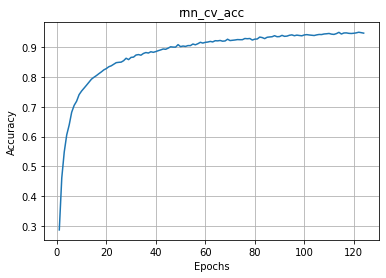

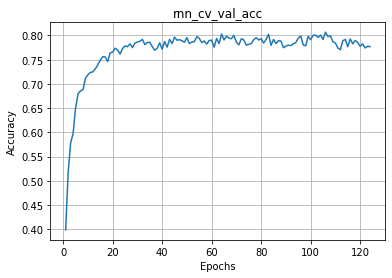

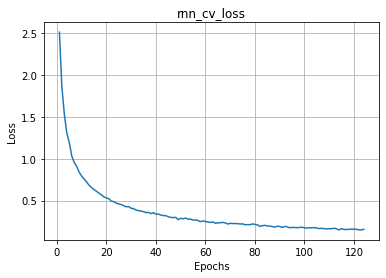

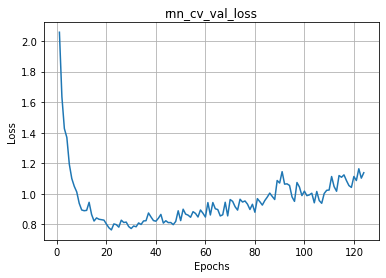

In [ ]:
for ind,item in enumerate(['rnn_cv_acc','rnn_cv_val_acc','rnn_cv_loss','rnn_cv_val_loss']):
  plt.figure(ind+1)
  plt.plot([j+1 for j in range(len(globals()[item]))],globals()[item],)
  plt.title(item)
  plt.xlabel('Epochs')
  if ind==0 or ind==1:
    plt.ylabel('Accuracy')
  else:
    plt.ylabel('Loss')
  plt.grid()
  plt.savefig('plots/{}.jpg'.format(item))

In [ ]:
rnn_cv_acc=[]
rnn_cv_val_acc=[]
rnn_cv_loss=[]
rnn_cv_val_loss=[]
for i in range(1,125):
  with open('rnn_cv/epoch{}.csv'.format(i),mode='r',newline='') as csv_file:
      csvreader = csv.reader(csv_file)
      for ind,row in enumerate(csvreader):
        if ind==0:
          rnn_cv_val_loss.append(float(row[1]))
        elif ind==2:
          rnn_cv_loss.append(float(row[1]))
        elif ind==1:
          rnn_cv_val_acc.append(float(row[1])) 
        elif ind==3:
          rnn_cv_acc.append(float(row[1]))  



In [ ]:
shutil.make_archive('plots','zip','plots')

'/content/plots.zip'